In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
dat = pd.read_excel('../data/Klaeger_Science_2017 Supplementary Table 2 Target Lists.xlsx', sheet_name='Kinobeads')
dat.head()

,Drug,Lysate,Beads,Gene Name,Relative Intensity DMSO,Relative Intensity 3 nM,Relative Intensity 10 nM,Relative Intensity 30 nM,Relative Intensity 100 nM,Relative Intensity 300 nM,...,Bottom,Top,Inflection,EC50,EC50 Standard Error,Correction Factor,Apparent Kd,R2,BIC,Target Classification
0,Abemaciclib,4 cell line mix,Kinobeads,AAK1,1,0.905556,0.791054,0.738292,0.639565,0.323354,...,0.009092,0.957905,151.288760,151.288760,45.696999,0.673073,101.828368,0.985386,-20.503519,High confidence
1,Abemaciclib,4 cell line mix,Kinobeads,ADCK1,1,1.045974,0.869866,1.141565,0.000000,0.000000,...,-0.001200,1.014355,63.935536,63.935536,68.832970,0.622595,39.805937,0.983520,-12.606135,High confidence
2,Abemaciclib,4 cell line mix,Kinobeads,BMP2K,1,1.101696,1.012297,1.087891,0.973740,0.863230,...,-1.003278,1.034558,84774.108960,84774.108960,217756.243215,0.660952,56031.642989,0.937247,-15.330485,High confidence
3,Abemaciclib,4 cell line mix,Kinobeads,CAMK2D,1,0.894551,0.984481,0.900583,0.440384,0.178266,...,0.018690,0.972850,95.373379,95.373379,12.131433,0.203913,19.447883,0.992088,-22.486948,High confidence
4,Abemaciclib,4 cell line mix,Kinobeads,CAMK2G,1,1.125435,1.565245,1.236451,0.315507,0.139777,...,0.043265,1.232332,82.363844,82.363844,NaN,0.217204,17.889794,0.939239,1.734623,High confidence


In [104]:
cols_to_keep = ['Drug', 'Gene Name', 'R2', 'Target Classification']
dat = dat[cols_to_keep]
dat.head()

,Drug,Gene Name,R2,Target Classification
0,Abemaciclib,AAK1,0.985386,High confidence
1,Abemaciclib,ADCK1,0.983520,High confidence
2,Abemaciclib,BMP2K,0.937247,High confidence
3,Abemaciclib,CAMK2D,0.992088,High confidence
4,Abemaciclib,CAMK2G,0.939239,High confidence


In [4]:
double_drug_targets = dat[dat['Gene Name'].apply(lambda x: ';' in x)]
double_drug_targets.shape

(128, 4)

In [5]:
first_genes = double_drug_targets['Gene Name'].apply(lambda x: x.split(';')[0])
second_genes = double_drug_targets['Gene Name'].apply(lambda x: x.split(';')[1])

repaired_double_targets = double_drug_targets.drop('Gene Name', axis=1).assign(**{'Gene Name':first_genes})
repaired_double_targets = repaired_double_targets.append(double_drug_targets.drop('Gene Name', axis=1).assign(**{'Gene Name':second_genes})) 
repaired_double_targets = repaired_double_targets[cols_to_keep]

In [6]:
dat = dat.drop(double_drug_targets.index).append(repaired_double_targets)
dat.head()

,Drug,Gene Name,R2,Target Classification
0,Abemaciclib,AAK1,0.985386,High confidence
1,Abemaciclib,ADCK1,0.983520,High confidence
2,Abemaciclib,BMP2K,0.937247,High confidence
3,Abemaciclib,CAMK2D,0.992088,High confidence
4,Abemaciclib,CAMK2G,0.939239,High confidence


In [105]:
genes_targeted = pd.unique(dat['Gene Name'])
len(genes_targeted)

520

In [113]:
set(genes_targeted)-set(louvain_tier1['names'])

{'AAK1',
 'ACAD10',
 'ACAD11',
 'ACADVL',
 'ACOX1',
 'ACOX3',
 'ACP1',
 'ACSL5',
 'ACTR2',
 'ACTR3',
 'ADCK1',
 'ADCK3',
 'ADCK5',
 'ADD2',
 'ADK',
 'ADSL',
 'AFF1',
 'AFF4',
 'AIMP1',
 'AKR1C3',
 'AP1B1',
 'AP1G1',
 'AP2A1',
 'AP2A2',
 'AP2B1',
 'AP2M1',
 'APRT',
 'AZI2',
 'BCR',
 'BRD4;BRD3',
 'C2CD5',
 'CAB39',
 'CABLES1',
 'CALM1',
 'CALR',
 'CAPNS1',
 'CAPZA1',
 'CARS',
 'CBR1',
 'CCAR2',
 'CCDC47',
 'CCNA2',
 'CCNB1',
 'CCNB2',
 'CCNE1',
 'CCNE2',
 'CCNH',
 'CCNI',
 'CCNK',
 'CCNT1',
 'CCNT2',
 'CDC23',
 'CDK10',
 'CERS2',
 'CHD4',
 'CIT',
 'CKAP5',
 'CKS1B',
 'CMPK1',
 'CNOT2',
 'COG1',
 'COMT',
 'COX6C',
 'CSNK2A1;CSNK2A3',
 'CSNK2B',
 'CTTN',
 'CYC1',
 'DBI',
 'DCAF7',
 'DCK',
 'DCTPP1',
 'DDB1',
 'DDT;DDTL',
 'DDX1',
 'DDX3X',
 'DDX42',
 'DDX6',
 'DHCR24',
 'DHX30',
 'DKC1',
 'DNAJA1',
 'DNAJB11',
 'DNAJC3',
 'DNAJC9',
 'DYNLL1',
 'DYNLL2',
 'EIF2B1',
 'EIF2S3;EIF2S3L',
 'EIF3J',
 'EIF3M',
 'EIF4G1',
 'EIF5B',
 'ERCC2',
 'ERLIN2',
 'ERN2',
 'ETF1',
 'ETFB',
 'EWSR1',
 'EXOC4'

In [13]:
louvain_tier1 = pd.read_csv('../results/louvain_clusters.txt', sep='\t')
len(set(louvain_tier1['names']) & set(genes_targeted))

238

In [14]:
alias = pd.read_excel('../data/KINASESmasterlist_w_Aliases.xlsx')
alias.head()

,Uniprot Protein,MS Gene,RNAseq Gene,RNAseq Accession,Family,Mouse Uniprot Protein,Mouse RNAseq gene,Mouse RNAseq Accession,Kinome Render Tree Name,Aliases (Conservative),...,Aliases,description,other_designations,Entrez_Symbol,Old_Name,Entrez_Synonyms,Entrez_other_designations,Unnamed: 18,Gene Symbol,Gene Symbol and Synonyms
0,AAK1,AAK1,AAK1,22848.0,Other,Aak1,Aak1,269774,AAK1,"AAK1,",...,NaN,AP2 associated kinase 1,adaptor-associated kinase 1,AAK1,AAK1,KIAA1048|MGC138170,adaptor-associated kinase 1,NaN,AAK1,AAK1
1,AAPK1,PRKAA1,PRKAA1,5562.0,CAMK,Aapk1,Prkaa1,105787,AMPK[alpha]1,"PRKAA1, AMPKa1",...,"AMPK, AMPKa1","protein kinase, AMP-activated, alpha 1 catalyt...","5'-AMP-activated protein kinase, catalytic alp...",PRKAA1,AMPKa1,AMPK|AMPKa1|MGC33776|MGC57364,"5'-AMP-activated protein kinase, catalytic alp...",NaN,PRKAA1,"AMPK, PRKAA1, AMPKa1"
2,AAPK2,PRKAA2,PRKAA2,5563.0,CAMK,Aapk2,Prkaa2,108079,AMPK[alpha]2,"PRKAA2, AMPK2, AMPKa2, PRKAA",...,"AMPK, AMPK2, AMPKa2, PRKAA","protein kinase, AMP-activated, alpha 2 catalyt...","5'-AMP-activated protein kinase, catalytic alp...",PRKAA2,AMPKa2,AMPK|AMPK2|PRKAA,"5'-AMP-activated protein kinase, catalytic alp...",NaN,PRKAA2,"AMPK2, AMPK, PRKAA, AMPKa2, PRKAA2"
3,ABL1,ABL1,ABL1,25.0,TK,Abl1,Abl1,11350,Abl,"ABL1,ABL, JTK7, bcr/abl, c-ABL, c-ABL1, v-abl",...,"ABL, JTK7, bcr/abl, c-ABL, c-ABL1, p150, v-abl","ABL proto-oncogene 1, non-receptor tyrosine ki...",Abelson tyrosine-protein kinase 1|bcr/c-abl on...,ABL1,ABL,ABL|JTK7|c-ABL|p150|v-abl,Abelson murine leukemia viral (v-abl) oncogene...,NaN,ABL1,"c-ABL1, p150, ABL, JTK7, v-abl, bcr/abl, c-ABL..."
4,ABL2,ABL2,ABL2,27.0,TK,Abl2,Abl2,11352,Arg,"ABL2,ABLL, ARG",...,"ABLL, ARG","ABL proto-oncogene 2, non-receptor tyrosine ki...","abelson-related gene protein|c-abl oncogene 2,...",ABL2,ARG,ABLL|ARG,Abelson murine leukemia viral (v-abl) oncogene...,NaN,ABL2,"ABL2, ABLL, ARG"


In [21]:
best_col = 'Uniprot Protein'
best_num = len(set(alias[best_col]) & set(genes_targeted))
for c in alias.columns:
    temp_set = set(alias[c])
    temp_len = len(set(alias[c]) & set(genes_targeted))
    if temp_len > best_num:
        best_col = c
        best_num = temp_len
        
print(best_col, best_num)

MS Gene 249


In [16]:
best_col = 'Uniprot Protein'
best_num = len(set(alias[best_col]) & set(louvain_tier1['names']))
for c in alias.columns:
    temp_set = set(alias[c])
    temp_len = len(set(alias[c]) & set(louvain_tier1['names']))
    if temp_len > best_num:
        best_col = c
        best_num = temp_len
        
print(best_col, best_num)

RNAseq Gene 473


### Alias note

RNAseq Gene is the column we use for our clusterings, while MS Gene appears to be the column used by Klaeger 2017

In [70]:
MS_to_RNAseq_mapper

{'AAK1': 'AAK1',
 'PRKAA1': 'PRKAA1',
 'PRKAA2': 'PRKAA2',
 'ABL1': 'ABL1',
 'ABL2': 'ABL2',
 'TNK2': 'TNK2',
 'ACVR1B': 'ACVR1B',
 'ACVR1C': 'ACVR1C',
 'ACVRL1': 'ACVRL1',
 'ACVR1': 'ACVR1',
 'ADCK1': 'ADCK1',
 'ADCK2': 'ADCK2',
 'ADCK3': 'CABC1',
 'ADCK4': 'ADCK4',
 'ADCK5': 'ADCK5',
 'ADK': 'ADK',
 'AGK': 'AGK',
 'AKT1': 'AKT1',
 'AKT2': 'AKT2',
 'AKT3': 'AKT3',
 'ALK': 'ALK',
 'ALPK1': 'ALPK1',
 'ALPK2': 'ALPK2',
 'ALPK3': 'ALPK3',
 'AMHR2': 'AMHR2',
 'ANKK1': 'ANKK1',
 'NPR1': 'NPR1',
 'NPR2': 'NPR2',
 'ARAF': 'ARAF',
 'ADRBK1': 'ADRBK1',
 'ADRBK2': 'ADRBK2',
 'ATM': 'ATM',
 'ATR': 'ATR',
 'AURKB': 'AURKB',
 'AURKC': 'AURKC',
 'ACVR2A': 'ACVR2A',
 'ACVR2B': 'ACVR2B',
 'BCKDK': 'BCKDK',
 'BLK': 'BLK',
 'BMP2K': 'BMP2K',
 'BMPR2': 'BMPR2',
 'BMPR1A': 'BMPR1A',
 'BMPR1B': 'BMPR1B',
 'BMX': 'BMX',
 'BRAF': 'BRAF',
 'BRD2': 'BRD2',
 'BRD3': 'BRD3',
 'BRD4': 'BRD4',
 'BRSK1': 'BRSK1',
 'BRSK2': 'BRSK2',
 'BTK': 'BTK',
 'BUB1': 'BUB1',
 'BUB1B': 'BUB1B',
 'CAMKV': 'CAMKV',
 'CDK11A': 'CD

In [22]:
from collections import Counter

MS_to_RNAseq_mapper = alias.set_index('MS Gene')['RNAseq Gene'].to_dict()
targeted_kinases = list(map(lambda x: MS_to_RNAseq_mapper[x], list(set(alias[best_col]) & set(genes_targeted))))
len(targeted_kinases)

249

In [ ]:
combined_alias_mapper = copy(MS_to_RNAseq_mapper)
combined_alias_mapper.update(alias.set_index('Uniprot Protein')['RNAseq Gene'].to_dict())

In [23]:
raw_counts_klaeger = Counter(dat['Gene Name'])

targeted_kinase_counts = {MS_to_RNAseq_mapper[gen]:count for gen,count in raw_counts_klaeger.items() if gen in targeted_kinases}


In [ ]:
#pd.Series(targeted_kinase_counts).to_csv('../results/targeted_kinase_counts.csv', sep=',')

### Understudied

In [52]:
understudied = pd.read_csv('../data/understudied_kinases.csv', header=None)[0]
understudied

0        AAK1 
1        CDKL4
2         AATK
3        STK38
4      MAP3K15
5         NEK8
6       PRPF4B
7       STK36 
8          CIT
9        ADCK1
10      STK38L
11      MAP3K2
12        NEK9
13         PXK
14        CLK1
15        CLK2
16        CLK3
17        CLK4
18       DAPK1
19       DAPK2
20       DAPK3
21        DMPK
22       DSTYK
23      DYRK1A
24      DYRK1B
25       DYRK2
26       DYRK3
27       DYRK4
28       EEF2K
29        ERN1
        ...   
198       SBK2
199      SCYL1
200      SCYL2
201      SCYL3
202     SGK071
203     SGK110
204     SGK196
205     SGK223
206     SGK494
207       SIK1
208       SIK2
209       SIK3
210        SLK
211       SNRK
212       SPEG
213       SRMS
214      SRPK1
215      SRPK2
216      SRPK3
217      STK10
218      STK16
219     STK17A
220     STK17B
221      STK24
222      STK25
223      STK31
224     STK32A
225     STK32B
226     STK32C
227      STK33
Name: 0, Length: 228, dtype: object

In [53]:
under_best_col = 'Uniprot Protein'
best_num = len(set(alias[under_best_col]) & set(understudied))
for c in alias.columns:
    temp_set = set(alias[c])
    temp_len = len(set(alias[c]) & set(understudied))
    if temp_len > best_num:
        under_best_col = c
        best_num = temp_len
        
print(under_best_col, best_num)

MS Gene 226


In [77]:
present_understudied = list(set(alias[under_best_col]) & set(understudied))

In [64]:
louvain_tier2 = pd.read_csv('../results/louvain_small_clusters.txt', sep='\t')
louvain_tier2.head()

,names,cluster
0,PAK1,3
1,ERBB2,18
2,MST1R,18
3,YES1,18
4,TYRO3,18


In [76]:
louv= louvain_tier1.merge(louvain_tier2.set_index('names'), how='left', on='names', suffixes=['_super', '_sub'])
louv.head()

,names,cluster_super,cluster_sub
0,PAK1,5,3
1,ERBB2,5,18
2,MST1R,5,18
3,YES1,5,18
4,TYRO3,5,18


In [78]:
from copy import copy 
present_understudied = [MS_to_RNAseq_mapper[gen] for gen in present_understudied]
counts_updated = copy(targeted_kinase_counts)
counts_updated.update({gen:0 for gen in louv['names'] if gen not in counts_updated})

louv['understudied'] = louv['names'].isin(present_understudied)*1
louv['target_count'] = louv['names'].apply(lambda x: counts_updated[x])
louv.head()

,names,cluster_super,cluster_sub,understudied,target_count
0,PAK1,5,3,0,0
1,ERBB2,5,18,0,0
2,MST1R,5,18,0,18
3,YES1,5,18,0,33
4,TYRO3,5,18,0,0


In [79]:
louv.head()

,names,cluster_super,cluster_sub,understudied,target_count
0,PAK1,5,3,0,0
1,ERBB2,5,18,0,0
2,MST1R,5,18,0,18
3,YES1,5,18,0,33
4,TYRO3,5,18,0,0


In [186]:
sub_counts = louv.groupby('cluster_sub').count()['names']
sub_counts.columns = ['count']

sub_grouping = louv.groupby('cluster_sub').agg({
    'cluster_super':'mean',
    'understudied':'sum',
    'target_count':'sum'
})
sub_grouping['count'] = sub_counts
#sub_grouping
sub_grouping

,cluster_super,understudied,target_count,count
cluster_sub,,,,
1,4,2,20,2
2,7,7,257,30
3,5,2,47,8
4,2,8,253,41
5,5,1,126,8
6,4,60,730,88
7,1,9,38,12
8,1,0,74,8
9,2,5,265,18


In [222]:
super_clusts = louv.set_index('cluster_super')['cluster_sub'].apply(lambda x: str(x)).groupby('cluster_super').agg(lambda x: ' '.join(x))
super_dict = super_clusts.apply(lambda x: list(set(x.split(' ')))).to_dict()

sub_sizes_dict = sub_grouping['count'].to_dict()
print(sub_sizes_dict)

super_dict = {x:sorted(y, key=lambda p: sub_sizes_dict[int(p)], reverse=True) for x,y in super_dict.items()}
super_dict

{1: 2, 2: 30, 3: 8, 4: 41, 5: 8, 6: 88, 7: 12, 8: 8, 9: 18, 10: 2, 11: 23, 12: 35, 13: 27, 14: 2, 15: 2, 16: 4, 17: 4, 18: 60, 19: 5, 20: 5, 21: 9, 22: 4, 23: 2, 24: 5, 25: 8, 26: 7, 27: 4, 28: 2, 29: 2, 30: 4, 31: 2, 32: 5, 33: 17, 34: 2, 35: 14, 36: 2}


{1: ['7', '8', '26'],
 2: ['4', '9', '21', '20', '10'],
 3: ['12', '11'],
 4: ['6',
  '13',
  '24',
  '32',
  '16',
  '17',
  '27',
  '34',
  '15',
  '1',
  '36',
  '23',
  '28',
  '14'],
 5: ['18', '35', '25', '3', '5', '31', '29'],
 6: ['19'],
 7: ['2', '33', '22'],
 8: ['30']}

In [223]:
super_sizes = sub_grouping.set_index('cluster_super').groupby('cluster_super')['count'].sum()
super_sizes
#sorted_super, __ =  zip(*sorted())

cluster_super
1     27
2     75
3     58
4    151
5    102
6      5
7     51
8      4
Name: count, dtype: int64

In [224]:
super_size_list, sorted_super_list = zip(*sorted(tuple(zip(super_sizes, super_sizes.index)), reverse=True))
super_size_list = list(super_size_list)
sorted_super_list = list(sorted_super_list)
print(super_size_list,sorted_super_list)

[151, 102, 75, 58, 51, 27, 5, 4] [4, 5, 2, 3, 7, 1, 6, 8]


In [225]:
number_smalls = [len(super_dict[x]) for x in sorted_super_list]
number_smalls

[14, 7, 5, 2, 3, 3, 1, 1]

In [268]:
location_start = [sum(number_smalls[0:i])+i*2.5 for i in range(len(number_smalls))]
location_start

[0.0, 16.5, 26.0, 33.5, 38.0, 43.5, 49.0, 52.5]

In [269]:
locations_sub_list = [[(super_dict[sorted_super_list[j]][i],i+location_start[j]) for i in range(len(super_dict[sorted_super_list[j]]))] for j in range(len(sorted_super_list))]
#locations_sub_list

In [270]:
locations_sub_dict = dict([x for y in locations_sub_list for x in y])
#locations_sub_dict

In [271]:
sub_grouping['prop_understudied'] = sub_grouping['understudied']*1.0/sub_grouping['count']
sub_grouping.head()

,cluster_super,understudied,target_count,count,prop_understudied,location
cluster_sub,,,,,,
1,4,2,20,2,1.000000,9
2,7,7,257,30,0.233333,36
3,5,2,47,8,0.250000,19
4,2,8,253,41,0.195122,25
5,5,1,126,8,0.125000,20


In [272]:
#sub_grouping['target_count'] = sub_grouping['target_count']
#sub_grouping.head()

In [273]:
sub_grouping['location'] = [locations_sub_dict[str(x)] for x in list(sub_grouping.index)]
sub_grouping.head()

,cluster_super,understudied,target_count,count,prop_understudied,location
cluster_sub,,,,,,
1,4,2,20,2,1.000000,9.0
2,7,7,257,30,0.233333,38.0
3,5,2,47,8,0.250000,19.5
4,2,8,253,41,0.195122,26.0
5,5,1,126,8,0.125000,20.5


In [275]:
sub_grouping['normalized_target_count'] = sub_grouping['target_count']*1.0/sub_grouping['count']
sub_grouping.head()

,cluster_super,understudied,target_count,count,prop_understudied,location,normalized_target_count
cluster_sub,,,,,,,
1,4,2,20,2,1.000000,9.0,10.000000
2,7,7,257,30,0.233333,38.0,8.566667
3,5,2,47,8,0.250000,19.5,5.875000
4,2,8,253,41,0.195122,26.0,6.170732
5,5,1,126,8,0.125000,20.5,15.750000


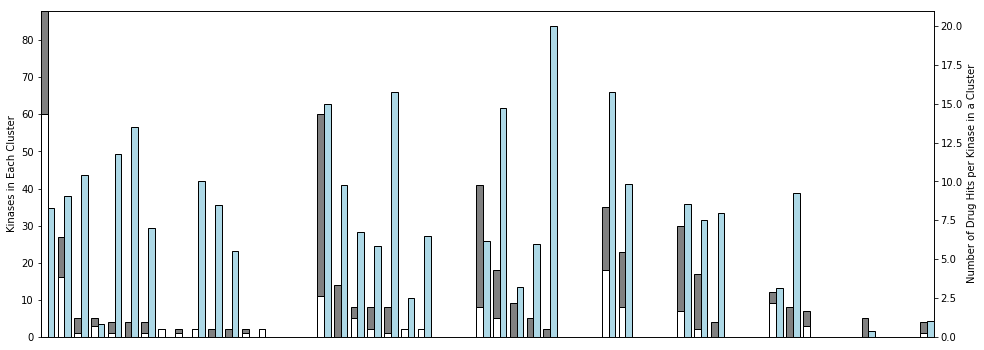

In [281]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,6))

ax.bar(sub_grouping['location']-0.4, 
       sub_grouping['understudied'],
       width=0.4,
       color='w',
       align='center',
       edgecolor='k')

ax.bar(sub_grouping['location']-0.4, 
       sub_grouping['count']-sub_grouping['understudied'],
       bottom=sub_grouping['understudied'],
       width=0.4,
       color='gray',
       align='center',
       edgecolor='k')

plt.ylabel('Kinases in Each Cluster')

## make the second plot

ax2 = ax.twinx()
ax2.bar(sub_grouping['location'], 
       sub_grouping['normalized_target_count'],
       width=0.4,
       color='lightblue',
       align='center',
       edgecolor='k')

plt.ylabel('Number of Drug Hits per Kinase in a Cluster')

ax.autoscale(tight=True)

#ax2.set_yscale('log')


#ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax.axes.get_yaxis().set_ticks([])
ax.axes.get_xaxis().set_ticks([])

plt.xlabel('Subcluster Number')

plt.show()

### Precision and 
